In [233]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier

In [234]:
df1 = pd.read_csv('YelpDataset_Reviews_Stars_20K.csv',header=None)

In [6]:
pd.read_csv?

In [235]:
def filterLen(docs, minlen=3):
    import re, string
    docs_raw4 = [re.sub('[\W_]+','', t) for t in docs.split() if len(t) >= minlen ]
    s = " "
    return s.join(docs_raw4)

In [236]:
import re
re.sub('[\W_]+', '', '123&test')

'123test'

In [237]:
#filtered min len keywords
df1[1] = df1[1].apply(filterLen)

In [117]:
df1[1][15000:]

15000    Someone please change the cooking oil With the...
15001    Yummy Chinese Food the corner Queen and Wilson...
15002    was really craving some noodles with beef and ...
15003    This our Chinese restaurant weve been using fo...
15004    Took while build the courage write review abou...
15005    This place has been here for long remember ser...
15006    This place great their food great but theyre n...
15007    Close and great sushiService was excellent and...
15008    This INJUSTICE Ramen After coming back from To...
15009    Went here today just because other ramen place...
15010    The one with the glasses teaThe GoodFriendly s...
15011    Came here whim after yoga class Kennedy RdWe h...
15012    Kyu Shou Japanese Noodle place you just want s...
15013    Sandwich most definitely favorite breakfastlun...
15014    Sandwich understated little sandwich bar Frede...
15015    went there this afternoon based yelps reviewso...
15016    was super impressed with the quality their fis.

In [238]:
X_train, X_test,y_train,y_test = df1[1][:15000],df1[1][15000:], df1[0][:15000], df1[0][15000:]

In [239]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
         self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
         return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [261]:
def makeVectorizer(max_df,min_df,norm,stopwords,lemmatizer):
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(lowercase = True,
                                stop_words = stopwords,
                                 max_df = max_df,
                                 min_df = min_df,
                                 norm = norm,
                                 max_features = 3000,
                                 tokenizer = lemmatizer)
    return vectorizer

In [262]:
lemmatizer = LemmaTokenizer()

In [263]:
vectorizer_idf = makeVectorizer(0.01,0.0005,'l2','english',lemmatizer)
vectorizer_idf_nolem=makeVectorizer(0.01,0.0005,'l2','english',None)

In [264]:
vectorizer_idf.fit(X_train)
vectorizer_idf_nolem.fit(X_train)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.01, max_features=3000, min_df=0.0005,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [265]:
vectorizer_idf.get_feature_names()

[u'1',
 u'100',
 u'1000',
 u'1015',
 u'1099',
 u'10pm',
 u'11',
 u'120',
 u'125',
 u'1299',
 u'13',
 u'14',
 u'150',
 u'16',
 u'17',
 u'18',
 u'1pm',
 u'1st',
 u'2',
 u'200',
 u'2009',
 u'2011',
 u'2012',
 u'2013',
 u'21',
 u'22',
 u'23',
 u'25',
 u'250',
 u'2nd',
 u'3',
 u'30',
 u'300',
 u'34',
 u'35',
 u'350',
 u'399',
 u'3rd',
 u'4',
 u'40',
 u'45',
 u'450',
 u'499',
 u'5',
 u'50',
 u'500',
 u'510',
 u'55',
 u'550',
 u'595',
 u'599',
 u'5pm',
 u'5star',
 u'6',
 u'60',
 u'600',
 u'650',
 u'699',
 u'6pm',
 u'7',
 u'70',
 u'700',
 u'730',
 u'750',
 u'799',
 u'7pm',
 u'8',
 u'80',
 u'850',
 u'899',
 u'8pm',
 u'9',
 u'90',
 u'995',
 u'999',
 u'9pm',
 u'absolute',
 u'accent',
 u'accept',
 u'acceptable',
 u'accepted',
 u'access',
 u'accident',
 u'accommodate',
 u'accommodating',
 u'accompanied',
 u'accompany',
 u'accompanying',
 u'according',
 u'account',
 u'accurate',
 u'acknowledge',
 u'acknowledged',
 u'act',
 u'acted',
 u'action',
 u'activity',
 u'actual',
 u'addicted',
 u'adding',
 u'

In [266]:
X_test_idf_l2_dtm = vectorizer_idf.transform(X_test)
X_train_idf_l2_dtm =vectorizer_idf.transform(X_train)

In [267]:
X_test_idf_l2_dtm_nolem = vectorizer_idf_nolem.transform(X_test)
X_train_idf_l2_dtm_nolem =vectorizer_idf_nolem.transform(X_train)

In [268]:
clfDT = DecisionTreeClassifier(max_depth=2000, class_weight='balanced',random_state=1)

In [269]:
clfDT.fit(X_train_idf_l2_dtm,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=2000, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [270]:
DTres = clfDT.predict(X_test_idf_l2_dtm)

In [271]:
DTres

array([2, 1, 4, ..., 4, 2, 2])

In [272]:
clfDT.score(X_test_idf_l2_dtm,y_test)

0.31459999999999999

In [273]:
def accuracy(res, y_test):
    sum = 0
    for i, j in enumerate(res):
        if j != y_test[i]:
            sum +=j-y_test[i]
    return float(sum)/float(len(res))

In [274]:
accuracy(DTres,list(y_test))

0.6946

In [275]:
def testdepth(max_depth):
    score = []
    scores_nolem=[]
    for depth in max_depth:
        clfDT = DecisionTreeClassifier(max_depth=depth, class_weight='balanced',random_state=1)
        clfDT.fit(X_train_idf_l2_dtm,y_train)
        score.append(clfDT.score(X_test_idf_l2_dtm,y_test))
        clfDT.fit(X_train_idf_l2_dtm_nolem,y_train)
        scores_nolem.append(clfDT.score(X_test_idf_l2_dtm_nolem,y_test))
    return score, scores_nolem


In [276]:
deltas =np.array(y_test) - DTres

In [277]:
import matplotlib.pyplot as plt
%matplotlib inline  

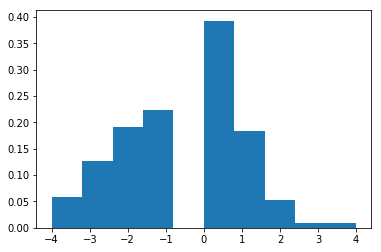

In [278]:
n,bin,patches=plt.hist(deltas,normed=1)
plt.show()

In [279]:
max_depthlist = np.linspace(10,1001,dtype=int)

In [280]:
scores, scores_nolem = testdepth(max_depthlist)

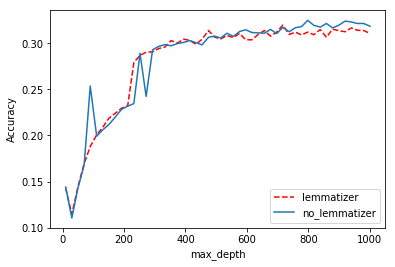

In [281]:
plt.plot(max_depthlist,scores,'r--',label='lemmatizer')
plt.plot(max_depthlist,scores_nolem,label='no_lemmatizer')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend(loc='best')


In [213]:
hist,bins = np.histogram(deltas)
center = (bins[:-1] + bins[1:]) / 2

<Container object of 10 artists>

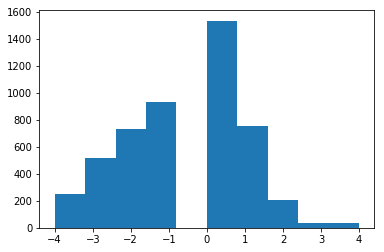

In [214]:
plt.bar(center,hist)

In [226]:
df_deltas=pd.Series(deltas)

In [228]:
df_deltas.value_counts()

 0    1536
-1     931
 1     752
-2     736
-3     515
-4     248
 2     208
 3      38
 4      36
dtype: int64